(820, 1060) uint8


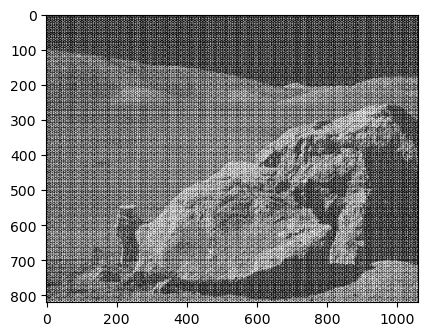

In [1]:
# Source
# https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2

from skimage import io
image = io.imread('Moonlanding_with_regular_noise.png')

M, N = image.shape

f, ax = plt.subplots(figsize=(4.8, 4.8))
ax.imshow(image, cmap='gray')

print((M, N), image.dtype)

In [2]:
from scipy import fftpack

F = fftpack.fftn(image)

F_magnitude = np.abs(F)
F_magnitude = fftpack.fftshift(F_magnitude)

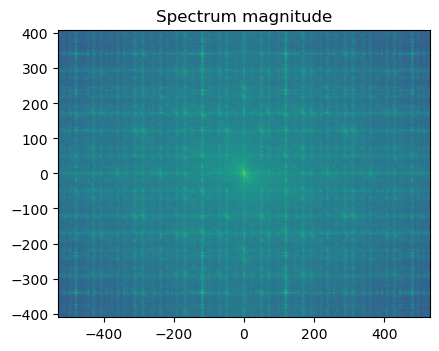

In [3]:
f, ax = plt.subplots(figsize=(4.8, 4.8))

ax.imshow(np.log(1 + F_magnitude), cmap='viridis',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

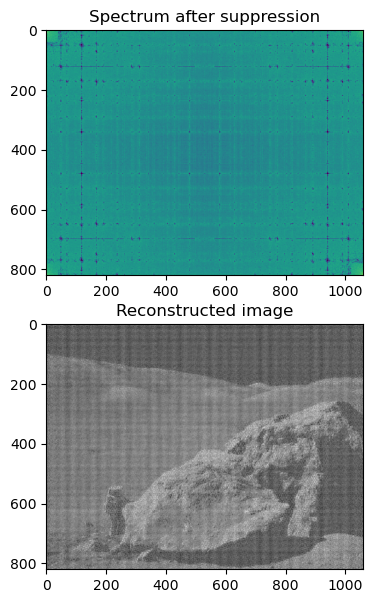

In [4]:
# Set block around center of spectrum to zero
K = 40
F_magnitude[M // 2 - K: M // 2 + K, N // 2 - K: N // 2 + K] = 0

# Find all peaks higher than the 98th percentile
peaks = F_magnitude < np.percentile(F_magnitude, 98)

# Shift the peaks back to align with the original spectrum
peaks = fftpack.ifftshift(peaks)

# Make a copy of the original (complex) spectrum
F_dim = F.copy()

# Set those peak coefficients to zero
F_dim = F_dim * peaks.astype(int)

# Do the inverse Fourier transform to get back to an image.
# Since we started with a real image, we only look at the real part of
# the output.
image_filtered = np.real(fftpack.ifft2(F_dim))

f, (ax0, ax1) = plt.subplots(2, 1, figsize=(4.8, 7))
ax0.imshow(np.log10(1 + np.abs(F_dim)), cmap='viridis')
ax0.set_title('Spectrum after suppression')

ax1.imshow(image_filtered, cmap='gray')
ax1.set_title('Reconstructed image');